# Simple Scatter Plots

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

### Scatter Plots with plt.plot

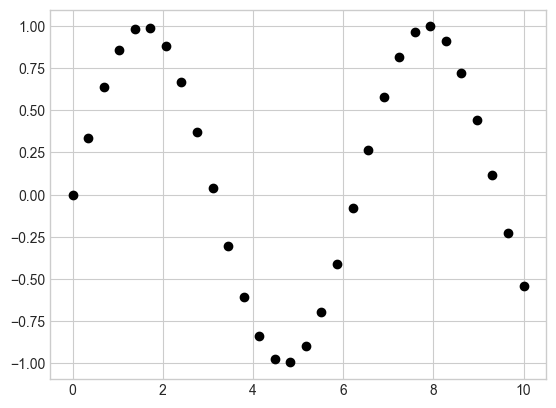

In [5]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black') # 'o' -> symbol to use

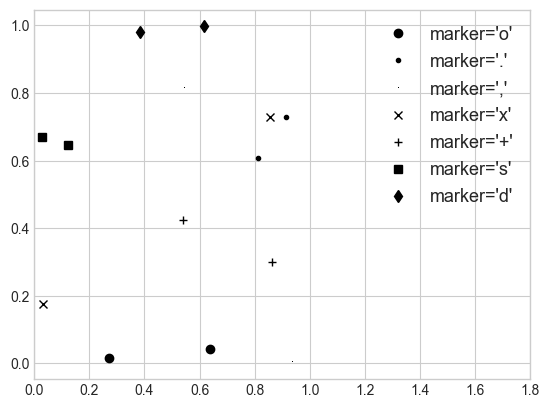

In [6]:
rng = np.random.default_rng(0)
for marker in ['o', '.', ',', 'x', '+', 's', 'd']:
    plt.plot(rng.random(2), rng.random(2), marker, color='black',
            label="marker='{0}'".format(marker))
    plt.legend(numpoints=1, fontsize=13)
    plt.xlim(0, 1.8);

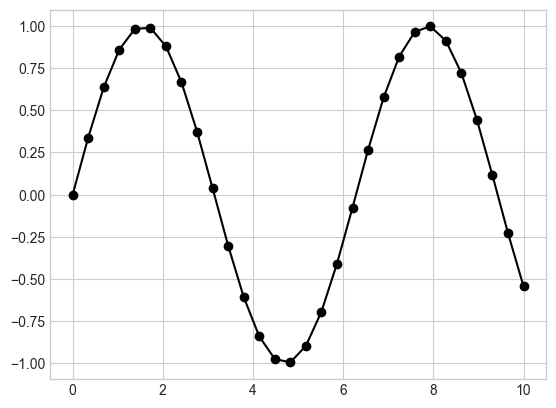

In [7]:
# Can be used alongside character codes

plt.plot(x, y, '-ok');

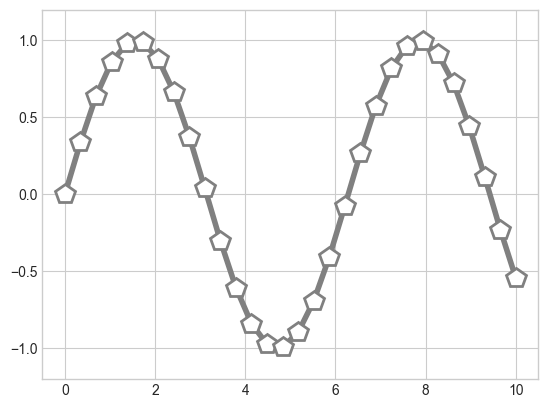

In [8]:
# Wide range of possibilities

plt.plot(x, y, '-p', color='gray',
        markersize=15, linewidth=4,
        markerfacecolor='white',
        markeredgecolor='gray',
        markeredgewidth='2')
plt.ylim(-1.2, 1.2);

### Scatter Plots with plt.scatter

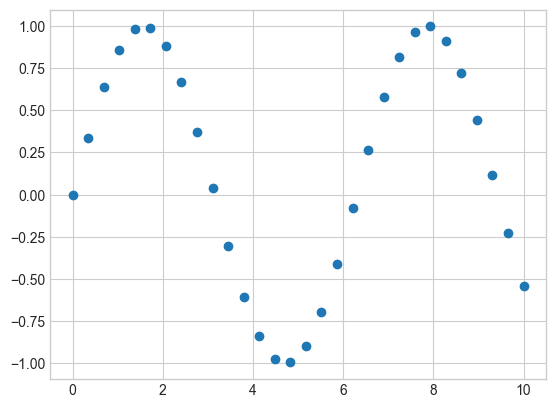

In [9]:
# The difference from plt.plot is that it can be used to create scatter plots where the properties
# of each individual point(size, face. color, edge color, etc.) can be individually controlled or
# mapped to data

 plt.scatter(x, y, marker='o');

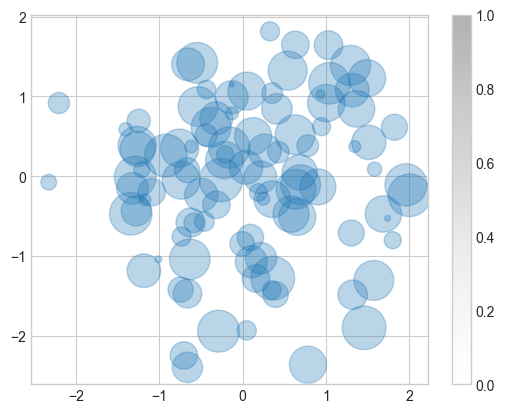

In [10]:
rng = np.random.default_rng(0)
x = rng.normal(size=100)
y = rng.normal(size=100)
colors = rng.random(100)
sizes = 1000 * rng.random(100)

plt.scatter(x, y, s=sizes, alpha = 0.3) # alpha -> transparency
plt.colorbar(); # show the color scale

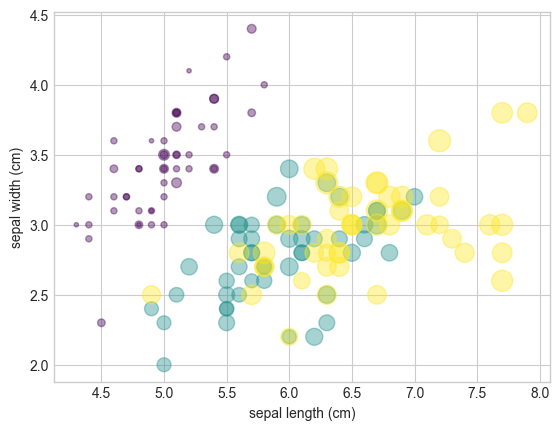

In [15]:
# Size and color of points can be used to convey informationin the visualization
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.4,
           s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

### plot Versus scatter: A Note on Efficiency

For large amounts of data plt.plot can be noticeable more efficient than plt.scatter. plt.scatter has the capability to render a different size and/or color for each point, so the renderer must do the extra work of construcing each point individually.

### Visualizing Uncertainties

### Basic Errorbars

<ErrorbarContainer object of 3 artists>

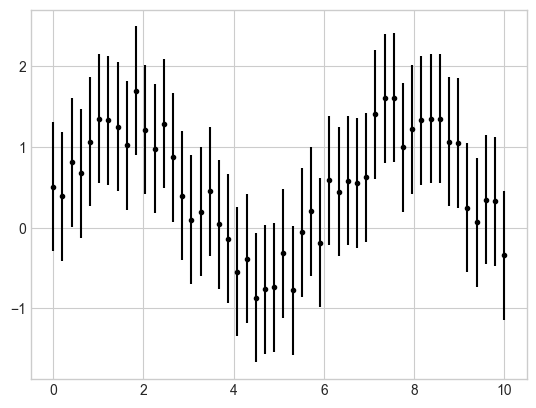

In [17]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.rand(50) 

plt.errorbar(x, y, yerr=dy, fmt='.k')

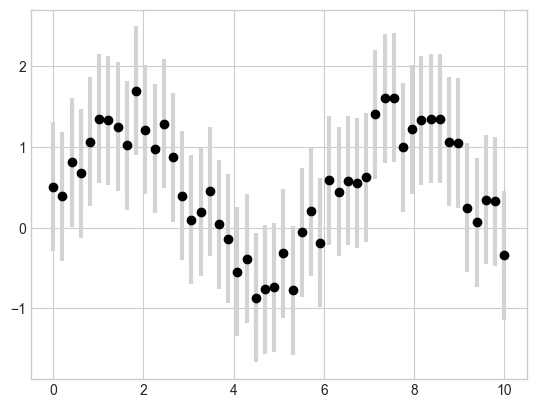

In [18]:
# Can be visually appealing to make the bars a light gray

plt.errorbar(x, y, yerr=dy, fmt='o', color='black', 
            ecolor='lightgray', elinewidth=3, capsize=0);

### Continuous Errors

In [20]:
from sklearn.gaussian_process import GaussianProcessRegressor

# Define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std=True)

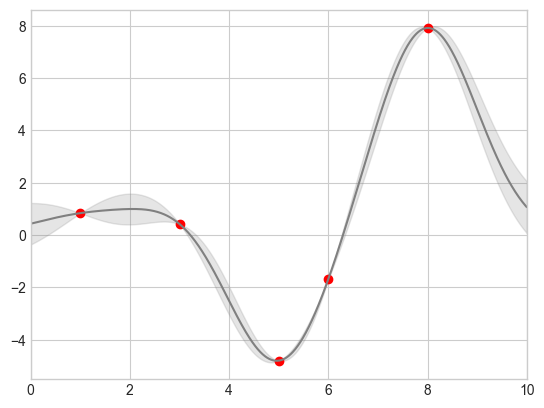

In [25]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                color='gray', alpha=0.2)
plt.xlim(0, 10);